In [1]:
#------------------------------------------------------------------------------------------------------#
# Roofline_Analysis.py                                                                                 #
# Authors: Kevin Howarth, Aditi Memani, Hari Raval, Taro Spirig                                        #
# Description: Python file to plot the Roofline Analysis                                               #
#------------------------------------------------------------------------------------------------------#

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

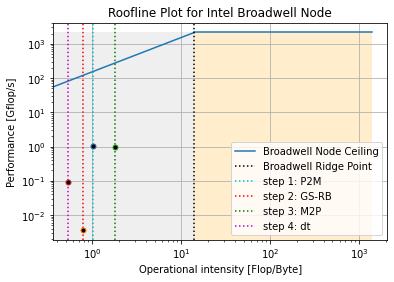

In [3]:
#------------------------------------------------------------------------------------------------------#
# functions and steps to generate the Roofline Plot and determine performance for each kernel

fig, ax = plt.subplots()

# caluculate boundaries using broadwell architecture for 1 node
pi= 2150.4
Beta = 76.8

def plot_boundaries_Broadwell(pi, Beta,ax):
    # I = pi/Beta
    I2 = pi/(Beta*2)
   
    # obtain boundaries for memory bound regions
    roofline_x2p1 = [0, I2]
    roofline_y2p1 = [0, pi]
    
    # obtain boundaries for compute bound region
    roofline_xp2 = [I2, I2*100]
    roofline_yp2 = [pi, pi]
    ax.loglog(roofline_x2p1, roofline_y2p1, color = 'C0', label="Broadwell Node Ceiling")
    ax.loglog(roofline_xp2, roofline_yp2, color = 'C0')
    
    # plot Numa ridge Point and Original Ridge Point
    ax.axvline(x = I2, ls =':', color = 'black', label = 'Broadwell Ridge Point')
    
    # plot shading for memory bound and compute bound regions in the roofline analysis
    ax.fill_betweenx(roofline_y2p1, 0, I2, facecolor='dimgray', alpha=.1)
    ax.fill_between(roofline_xp2, 0, pi, facecolor='orange', alpha=0.2)

# plot only the Broadwell Ceilings 
plot_boundaries_Broadwell(pi, Beta, ax)


# performance method
def performance(flops, num_steps, num_particles, t_max): 
    return flops*num_steps*num_particles*(10**-9)/t_max

# calculate flops and memory read and writes for each step 
num_grids = 1500
flops_s1 = 4+4*4*(4+2+3++6+1+6+3)
flops_s2 = 19*num_grids*num_grids
flops_s3 = 4*4*(46)+4
flops_s4 = (4+4+2)+1/2*(8)+1/2*(6)

# each steps memory reads and writes
mem_s1 = 1+2+4*4*(6)
mem_s2 = 6*num_grids*num_grids
mem_s3 = 4+1+(4*4*6)+2 
mem_s4 = (2+2+2)+1/2*(4) 

# NOTE: Below show our assumptions for calculating Step 4's memory reads and writes:
    # we assumed 8 operations for half of the particles due to the periodic wrap around 
    # we decided two of the while loops require 2 operations and the other two while loops only require 1
    # for half of the particles we still need to evaluate each operation within the while loop condition
    # we are also assuming that a particle will only reach the boundaries once in its lifetime 

# operational Intensity for each step
I_s1 = flops_s1/(mem_s1*4)
I_s2 = flops_s2/(mem_s2*4)
I_s3 = flops_s3/(mem_s3*4)
I_s4 = flops_s4/(mem_s4*4)

# plot op intensity line fore each step
ax.axvline(x = I_s1,ls =':', color = 'c', label = 'step 1: P2M')
ax.axvline(x = I_s2, ls = ':',color = 'r', label = 'step 2: GS-RB')
ax.axvline(x = I_s3, ls =':',color = 'g', label = 'step 3: M2P')
ax.axvline(x = I_s4,ls =':', color = 'm', label = 'step 4: dt')


# calculate performance of each step for the sequential version of the algorithm
num_steps = 100
num_particles = 30000000
t_seq = [1182.6686, 1184.578, 2281.6812, 565.3579]
p1_s1 = performance(flops_s1,num_steps, num_particles, t_seq[0]) 
p1_s2 = performance(flops_s2,num_steps,1,t_seq[1]) 
p1_s3 = performance(flops_s3,num_steps, num_particles,t_seq[2]) 
p1_s4 = performance(flops_s4,num_steps, num_particles,t_seq[3]) 

# plot performance of each step for the sequential version of the algorithm
ax.plot(I_s1, p1_s1, marker="o", markersize=5, markerfacecolor="black")
ax.plot(I_s2, p1_s2, marker="o", markersize=5, markerfacecolor="black")
ax.plot(I_s3, p1_s3, marker="o", markersize=5, markerfacecolor="black")
ax.plot(I_s4, p1_s4, marker="o", markersize=5, markerfacecolor="black")


ax.legend()
ax.set_xlabel("Operational intensity [Flop/Byte]")
ax.set_ylabel("Performance [Gflop/s]")
ax.set_title("Roofline Plot for Intel Broadwell Node");
ax.grid()
plt.show()

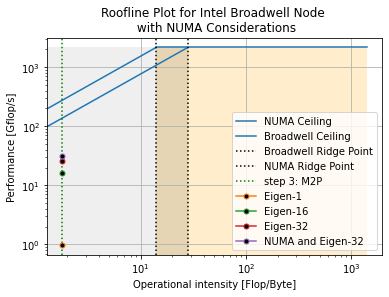

In [4]:
fig, ax1 = plt.subplots()

# method to plot both Broadwell and NUMA ceilings
def plot_boundaries(pi, Beta,ax):
    # I = pi/Beta
    I1 = pi/Beta
    I2 = pi/(Beta*2)
    
    # obtain boundaries for memory bound regions
    roofline_x1p1 = [0, I1]
    roofline_y1p1 = [0, pi]
    roofline_x2p1 = [0, I2]
    roofline_y2p1 = [0, pi]
    
    # obtain boundaries for compute bound region
    roofline_xp2 = [I2, I2*100]
    roofline_yp2 = [pi, pi]
    ax.loglog(roofline_x1p1, roofline_y1p1, label="NUMA Ceiling")
    ax.loglog(roofline_x2p1, roofline_y2p1, color = 'C0', label="Broadwell Ceiling")
    ax.loglog(roofline_xp2, roofline_yp2, color = 'C0')
    
    # plot Numa ridge Point and Original Ridge Point
    ax.axvline(x = I2, ls =':', color = 'black', label = 'Broadwell Ridge Point')
    ax.axvline(x = I1, ls =':', color = 'black', label = 'NUMA Ridge Point')
    
    # plot shading for memory bound and compute bound regions in the roofline analysis
    ax.fill_betweenx(roofline_y1p1, 0,I1 , facecolor='dimgray', alpha=.1)
    ax.fill_betweenx(roofline_y2p1, I1, I2, facecolor='dimgray', alpha=.1)
    ax.fill_between(roofline_xp2, 0, pi, facecolor='orange', alpha=0.2)

# Plot both the NUMA and Broadwell Ceilings
plot_boundaries(pi, Beta, ax1)

# FLOPs for step 3
flops_s3 = 4*4*(46)+4

# memory read and writes for Step: 3
mem_s3 = 4+1+(4*4*6)+2 

# operational Intensity for Step: 3
I_s3 = flops_s3/(mem_s3*4)


# plot op intensity line fore Step: 3
ax1.axvline(x = I_s3, ls =':',color = 'g', label = 'step 3: M2P')

# calculate performance and plot performance for each version fo Step 3 kernel
num_steps = 100
num_particles = 30000000 

# obtain performance for step 3 for t(16) using eigen library, t(32) using eigen library, and t(32) using eigen library and numa
p2_s3 = performance(flops_s3,num_steps, num_particles,138.22342) 
p3_s3 = performance(flops_s3,num_steps, num_particles, 84.59589) 
p4_s3 = performance(flops_s3,num_steps, num_particles,69.97404) 

# Plot each performance value for Step 3
ax1.plot(I_s3, p1_s3, marker="o", markersize=5, markerfacecolor="black", label= 'Eigen-1')
ax1.plot(I_s3, p2_s3, marker="o", markersize=5, markerfacecolor="black", label= 'Eigen-16')
ax1.plot(I_s3, p3_s3, marker="o", markersize=5, markerfacecolor="black", label= 'Eigen-32')
ax1.plot(I_s3, p4_s3, marker="o", markersize=5, markerfacecolor="black", label='NUMA and Eigen-32')

ax1.legend()
ax1.set_xlabel("Operational intensity [Flop/Byte]")
ax1.set_ylabel("Performance [Gflop/s]")
ax1.set_title("Roofline Plot for Intel Broadwell Node \n with NUMA Considerations");
ax1.grid()
plt.show()

In [13]:
# calculate the speed up rate for each layer of parralelization
t_eigen = 5214.28564453125
t_eigen4 = 1260.3978271484375
t_eigen8 = 665.9816284179688
t_eigen12 = 489.5262145996094
t_eigen16 = 427.8973083496094
t_eigen20 = 335.505187798828125
t_eigen24 = 321.7918395996094
t_eigen28 = 260.1357116699219

t_eigen_numa32 = 245.80926513671875

# obtain arrays to plot the strong scaling curve
S_eigen_x = [1, 4, 8, 12, 16, 20, 24, 28, 32]
S_eigen_y = [t_eigen/t_eigen, 
             t_eigen/t_eigen4, 
             t_eigen/t_eigen8, 
             t_eigen/t_eigen12,
             t_eigen/t_eigen16,
             t_eigen/t_eigen20,
             t_eigen/t_eigen24,
             t_eigen/t_eigen28, 
             t_eigen/t_eigen_numa32]

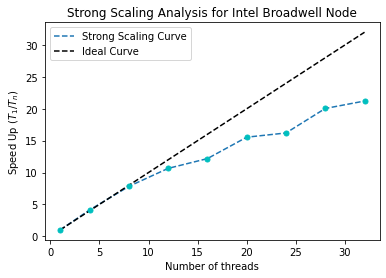

In [14]:
# Plot the Strong Scaling Curve 
fig, ax2 = plt.subplots()

ax2.plot(S_eigen_x, S_eigen_y, ls ='--', label ='Strong Scaling Curve')

# plot the ideal curve
ax2.plot([1,32], [1,32], ls ='--', color='black', label='Ideal Curve')

# plot each point for each layer of parallelization along the strong scaling curve
for i in zip(S_eigen_x, S_eigen_y):
    ax2.plot(i[0], i[1], marker="o", markersize=5,color='c')
    
ax2.legend()
ax2.set_xlabel("Number of threads")
ax2.set_ylabel("Speed Up ($T_1/T_n$)")
ax2.set_title("Strong Scaling Analysis for Intel Broadwell Node");
plt.show()